# Computational Physics: Problem Set 3

## Exercise 1)

### 7.2 Detecting periodicity

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import argrelextrema
plt.style.use('seaborn-poster')
%matplotlib inline

#### a) Plot sunspots vs. months.

In [12]:
#Load data
data = np.loadtxt("/Users/sara/Downloads/sunspots.txt")
month = data[:, 0]
sunspots = data[:, 1]

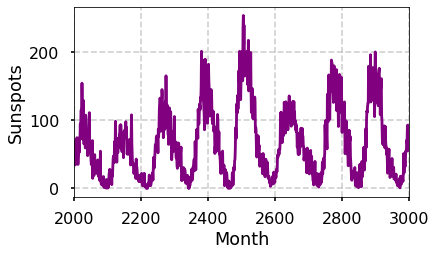

Estimated period of the sunspots is 100 months.


In [48]:
#Plot data
plt.figure(figsize=(6,3.5))
plt.plot(month, sunspots, color='purple')
plt.xlabel("Month")
plt.ylabel("Sunspots")
plt.xlim(2000,3000)
plt.grid(True, ls="--", alpha=0.6)
plt.show()

print("Estimated period of the sunspots is 100 months.")

#### b) Compute FFT and plot |FFT|^2.

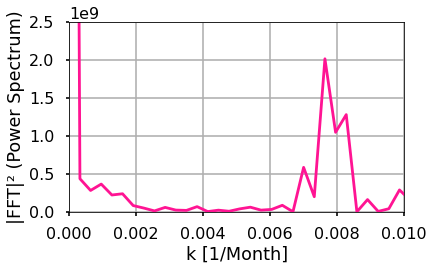

In [279]:
#Fourier transform
FFT_sunspots = np.fft.fft(sunspots)

freq = np.fft.fftfreq(len(sunspots), d=1) #set equally spaced freq axis
power = np.abs(FFT_sunspots)**2 #compute mag^2

mask = freq >= 0 #for plotting only pos freqs

plt.figure(figsize=(6,3.5))
plt.plot(freq[mask], power[mask], color='deeppink')
plt.xlabel('k [1/Month]')
plt.ylabel('|FFT|² (Power Spectrum)')
plt.xlim(0,0.01)
plt.ylim(0,0.25*10**10)
plt.grid(True)
plt.show()

#### c) Find at maximum |FFT|² value and corresponding time in months.

In [47]:
x_min, x_max = 0.006, 0.009 #know max is in this range

mask = (freq >= x_min) & (freq <= x_max)

freq_sub = freq[mask]
power_sub = power[mask]

# find y_max
idx_max = np.argmax(power_sub)

# find correspodning x
x_at_max = freq_sub[idx_max]
y_at_max = power_sub[idx_max]

print(f"The maximum of the |FFT|² values is located at k = {x_at_max:.4f}. The corresponding time period of the measured sunspots is therefore {1/x_at_max:.4f} months.")


The maximum of the |FFT|² values is located at k = 0.0076. The corresponding time period of the measured sunspots is therefore 130.9583 months.


## Exercise 2)

### 7.4 Fourier filtering and smoothing

#### a) Load and plot data.

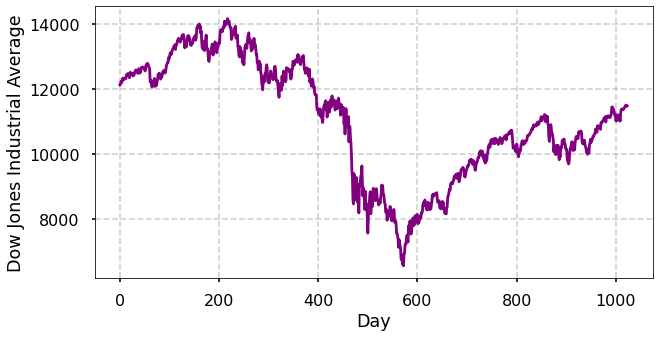

In [50]:
#Load data
dow = np.loadtxt("/Users/sara/Downloads/dow.txt")

#Plot data
plt.figure(figsize=(10,5))
plt.plot(dow, color='purple')
plt.xlabel("Day")
plt.ylabel("Dow Jones Industrial Average")
#plt.xlim(2000,3000)
plt.grid(True, ls="--", alpha=0.6)
plt.show()

#### b) Discrete FFT using rfft.

In [101]:
freq=np.fft.rfftfreq(len(dow), 1)
rfft=np.fft.rfft(dow)

print (f"The provided Dow data has N={len(dow)} values.")
print (f"The calculated discrete FFT has a length of 1/2*N+1={len(rfft)} values.")

The provided Dow data has N=1024 values.
The calculated discrete FFT has a length of 1/2*N+1=513 values.


#### c) Set last 90% of the FFT array to zero.

In [231]:
rfft1=np.fft.rfft(dow)
rfft2=np.fft.rfft(dow)

N1 = 462
rfft1[-N1:] = 0

N2 = 503
rfft2[-N2:] = 0
#print(rfft)

#### d) Calculate inverse FFT and plot it along side original data.

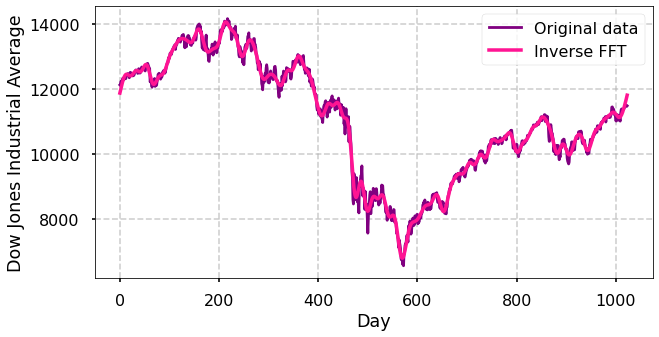

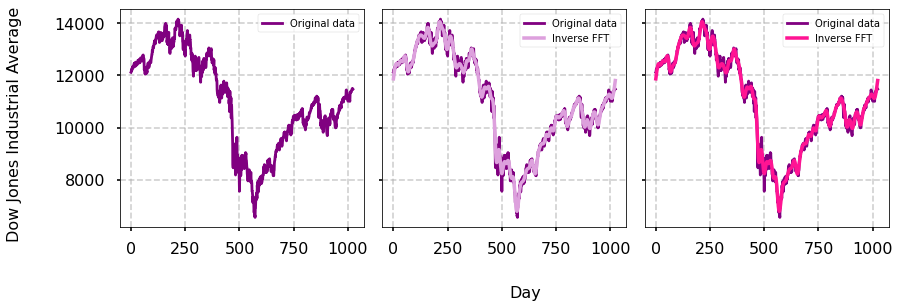

In [278]:
irfft1=np.fft.irfft(rfft1, n=len(dow))
irfft2=np.fft.irfft(rfft2, n=len(dow))

#Plot inverse FFT and original data

#Plot data
plt.figure(figsize=(10,5))
plt.plot(dow, color='purple', label='Original data')
#plt.plot(np.real(irfft1), color='plum', linewidth=3.5, label='Inverse FFT')
plt.plot(np.real(irfft1), color='deeppink', linewidth=3.5, label='Inverse FFT')
plt.xlabel("Day")
plt.ylabel("Dow Jones Industrial Average")
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)
axs[0].plot(dow, color='purple', label='Original data')
axs[0].grid(True, ls="--", alpha=0.6)
axs[0].legend(fontsize=10)

axs[1].plot(dow, color='purple', label='Original data')
axs[1].plot(np.real(irfft1), color='plum', linewidth=3.5, label='Inverse FFT')
axs[1].grid(True, ls="--", alpha=0.6)
axs[1].legend(fontsize=10)

axs[2].plot(dow, color='purple', label='Original data')
axs[2].plot(np.real(irfft1), color='deeppink', linewidth=3.5, label='Inverse FFT')
axs[2].grid(True, ls="--", alpha=0.6)
axs[2].legend(fontsize=10)

fig.supylabel("Dow Jones Industrial Average", fontsize=16)
fig.supxlabel("Day", fontsize=16)
fig.tight_layout(rect=[0.03, 0.03, 0.85, 0.85])
plt.show()

## Exercise 3)

### 7.9 Detecting periodicity

#### a) Load and plot brightness of blurred photo.

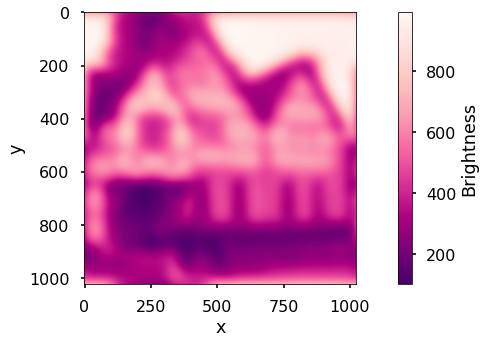

In [200]:
data = np.loadtxt("/Users/sara/Downloads/blur.txt")

cmap = plt.cm.RdPu
cmap_r = cmap.reversed()

plt.figure(figsize=(15,5))
plt.imshow(data, origin='upper', cmap=cmap_r)
plt.colorbar(label='Brightness')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### b) Plot Gaussian of given image size

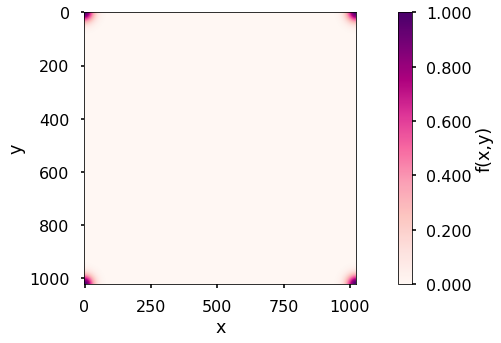

In [199]:
# Create array
Ny, Nx = data.shape
y = np.arange(Ny)-Ny//2
x = np.arange(Nx)-Nx//2
X, Y = np.meshgrid(x, y)

#Define Gaussian
sigma = 25.0   # standard deviation

gaussian = np.exp(-((X**2+Y**2)/(2*sigma**2)))
#gaussian /= np.sum(gaussian)
gaussian_shifted = np.fft.ifftshift(gaussian)

#Plot
plt.figure(figsize=(15,5))
plt.imshow(gaussian_shifted, origin='upper', cmap='RdPu')
plt.colorbar(label='f(x,y)', format="%.3f")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### c) Deblur image

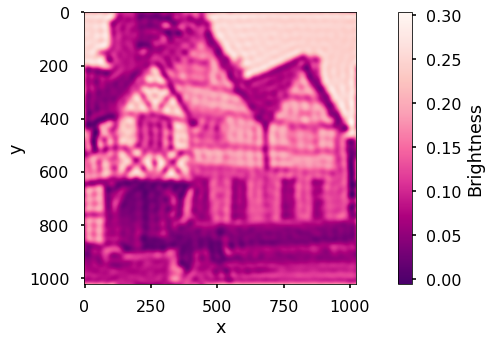

In [205]:
image_fft=np.fft.rfft2(data)
gaussian_fft=np.fft.rfft2(gaussian_shifted)

threshold = 1e-1
small_vals = np.abs(gaussian_fft) < threshold
gaussian_fft_mod = gaussian_fft.copy()
gaussian_fft_mod[small_vals] = 1.0  

deblurred_fft = image_fft / gaussian_fft_mod

deblurred_ifft=np.fft.irfft2(deblurred_fft)

cmap = plt.cm.RdPu
cmap_r = cmap.reversed()

plt.figure(figsize=(15,5))
plt.imshow(deblurred_ifft, origin='upper', cmap=cmap_r)
plt.colorbar(label='Brightness')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


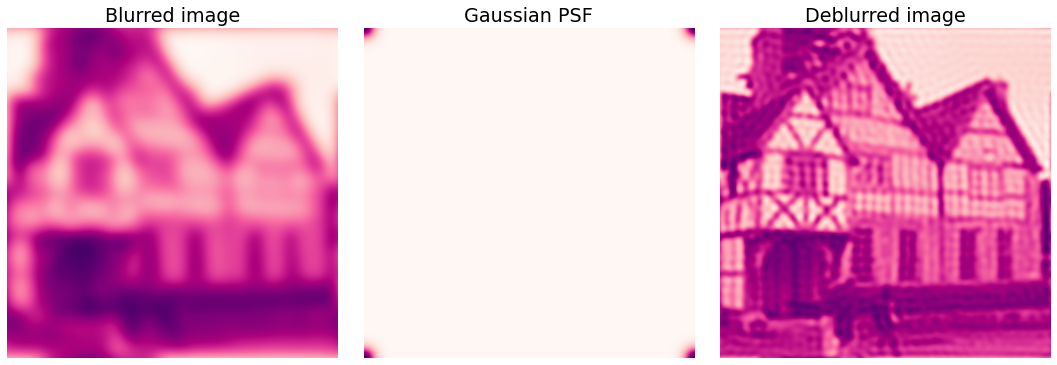

In [213]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(data, cmap=cmap_r)
axs[0].set_title("Blurred image")
axs[1].imshow(gaussian_shifted, cmap="RdPu")
axs[1].set_title("Gaussian PSF")
axs[2].imshow(deblurred, cmap=cmap_r)
axs[2].set_title("Deblurred image")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()